<a href="https://colab.research.google.com/github/kaykaushal/spatial_ds_airpoluttion/blob/main/CDS_DataLoad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cdsapi xarray cartopy

In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
#import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

## Sample API Data Download

In [4]:
import cdsapi
# CDS credential
url = "https://cds.climate.copernicus.eu/api/v2"
api_key = "XXXXXXXXXXXXXX"

# Download Data
c = cdsapi.Client(url=url, key=api_key)
c.retrieve("reanalysis-era5-pressure-levels",
{
"variable": "temperature",
"pressure_level": "1000",
"product_type": "reanalysis",
"year": "2008",
"month": "01",
"day": "01",
"time": "12:00",
"format": "netcdf"
}, "download.nc")

2023-08-02 13:35:18,716 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-08-02 13:35:18,720 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-08-02 13:35:19,110 INFO Request is completed
INFO:cdsapi:Request is completed
2023-08-02 13:35:19,113 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data3/adaptor.mars.internal-1689599313.1988957-26125-13-c3919a21-cc34-4bf6-be00-70d2f638b5b9.nc to download.nc (2M)
INFO:cdsapi:Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data3/adaptor.mars.internal-1689599313.1988957-26125-13-c3919a21-cc34-4bf6-be00-70d2f638b5b9.nc to download.nc (2M)
2023-08-02 13:35:22,487 INFO Download rate 604.3K/s
INFO:cdsapi:Download rate 604.3K/s


Result(content_length=2086236,content_type=application/x-netcdf,location=https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data3/adaptor.mars.internal-1689599313.1988957-26125-13-c3919a21-cc34-4bf6-be00-70d2f638b5b9.nc)

In [5]:
file_path = "download.nc"
demo_data = xr.open_dataset(file_path)
demo_data

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2008-01-01T12:00:00
Data variables:
    t          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-07-17 13:08:33 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
variable = demo_data['t'].isel(time=0)
variable = variable.transpose('latitude', 'longitude')
variable

<xarray.DataArray 't' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 2008-01-01T12:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


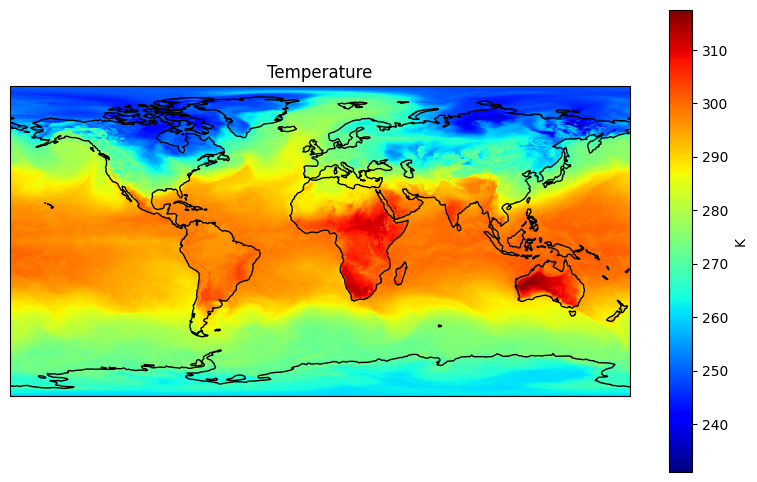

In [7]:
# Create a map plot
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data using pcolormesh
#variable.plot.pcolormesh(ax=ax, x='longitude', y='latitude', transform=ccrs.PlateCarree(), cmap='jet')
im = ax.pcolormesh(variable['longitude'], variable['latitude'], variable, transform=ccrs.PlateCarree(), cmap='jet')

# Add coastlines and a colorbar
ax.coastlines()
plt.colorbar(im, ax=ax, label=variable.units)

# Set plot title and axis labels
plt.title('Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [8]:
## Download Data for Study area
years = [str(x) for x in range(2002, 2022)]
study_area = [39.2, 62.8, 1.7, 105.6]
months = ['03','04','05','06']
days = [ '01','02','03',
  '04','05','06',
  '07','08','09',
  '10','11','12',
  '13','14','15',
  '16','17','18',
  '19','20','21',
  '22','23','24',
  '25','26','27',
  '28','29','30',
  '31'
]

# Download the data with the study area
for year in years:
  for month in months:
    c.retrieve(
        "reanalysis-era5-pressure-levels",
        {
            "variable": "temperature",
            "pressure_level": "1000",
            "product_type": "reanalysis",
            "year": "2015",
            "month": months,
            "day": days,
            "time": "15:00",
            "area": study_area,  # Add the study area bounding box here
            "format": "netcdf"
        },
        f"era5_hw_temp_{year}_{month}.nc"
    )

2023-08-02 13:36:53,271 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-08-02 13:36:53,275 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-08-02 13:36:53,671 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data7/adaptor.mars.internal-1690970117.179215-18081-6-4104b9c5-92a0-4063-8d19-4e04e4fdae30.nc to era5_hw_temp_2002_03.nc (6M)
INFO:cdsapi:Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data7/adaptor.mars.internal-1690970117.179215-18081-6-4104b9c5-92a0-4063-8d19-4e04e4fdae30.nc to era5_hw_temp_2002_03.nc (6M)
2023-08-02 13:36:57,369 INFO Download rate 1.6M/s
INFO:cdsapi:Download rate 1.6M/s
2023-08-02 13:36:57,808 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-08-02 13:36:57,811 INFO Sending request to

In [68]:
file_path = "download_ind_hw.nc"
hw_dataset = xr.open_dataset(file_path)
hw_dataset

<xarray.Dataset>
Dimensions:    (longitude: 172, latitude: 151, time: 122)
Coordinates:
  * longitude  (longitude) float32 62.8 63.05 63.3 63.55 ... 105.1 105.3 105.6
  * latitude   (latitude) float32 39.2 38.95 38.7 38.45 ... 2.45 2.2 1.95 1.7
  * time       (time) datetime64[ns] 2015-03-01T15:00:00 ... 2015-06-30T15:00:00
Data variables: (12/16)
    pv         (time, latitude, longitude) float32 ...
    crwc       (time, latitude, longitude) float32 ...
    cswc       (time, latitude, longitude) float32 ...
    z          (time, latitude, longitude) float32 ...
    t          (time, latitude, longitude) float32 ...
    u          (time, latitude, longitude) float32 ...
    ...         ...
    d          (time, latitude, longitude) float32 ...
    r          (time, latitude, longitude) float32 ...
    o3         (time, latitude, longitude) float32 ...
    clwc       (time, latitude, longitude) float32 ...
    ciwc       (time, latitude, longitude) float32 ...
    cc         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-01 11:44:50 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [65]:
list(hw_dataset.variables)

['longitude', 'latitude', 'time', 't']

In [72]:
# Download the combined dataset in GRIB format
c.retrieve(
    "reanalysis-era5-land",
    {
        "variable": "skin_temperature",
        "pressure_level": "1000",
        "product_type": "reanalysis",
        "year": "2015",
        "month": months,
        "day": days,
        "time": "15:00",
        "area": study_area,  # Add the study area bounding box here
        "format": "netcdf",  # Use 'grib' for GRIB format
    },
    "download_sk_temp.nc"  # Save the combined dataset in GRIB format to this file
)

2023-08-01 12:04:21,247 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-08-01 12:04:21,249 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-08-01 12:04:21,425 INFO Request is queued
INFO:cdsapi:Request is queued
2023-08-01 12:04:22,562 INFO Request is running
INFO:cdsapi:Request is running
2023-08-01 12:06:16,196 INFO Request is completed
INFO:cdsapi:Request is completed
2023-08-01 12:06:16,199 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data4/adaptor.mars.internal-1690891566.43795-6063-9-f7c57081-9ff4-4dc5-a780-64595aad96c2.nc to download_sk_temp.nc (37.5M)
INFO:cdsapi:Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data4/adaptor.mars.internal-1690891566.43795-6063-9-f7c57081-9ff4-4dc5-a780-64595aad96c2.nc to download_sk_temp.nc (37.5M)
2023-08-01

Result(content_length=39362948,content_type=application/x-netcdf,location=https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data4/adaptor.mars.internal-1690891566.43795-6063-9-f7c57081-9ff4-4dc5-a780-64595aad96c2.nc)

In [19]:
file_path = "/content/era5_hw_temp_2002_03.nc"
hw_dataset = xr.open_dataset(file_path)
hw_dataset

<xarray.Dataset>
Dimensions:    (longitude: 172, latitude: 151, time: 122)
Coordinates:
  * longitude  (longitude) float32 62.8 63.05 63.3 63.55 ... 105.1 105.3 105.6
  * latitude   (latitude) float32 39.2 38.95 38.7 38.45 ... 2.45 2.2 1.95 1.7
  * time       (time) datetime64[ns] 2015-03-01T15:00:00 ... 2015-06-30T15:00:00
Data variables:
    t          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-02 09:55:17 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [20]:
hw_dataset['t']

<xarray.DataArray 't' (time: 122, latitude: 151, longitude: 172)>
[3168584 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 62.8 63.05 63.3 63.55 ... 105.1 105.3 105.6
  * latitude   (latitude) float32 39.2 38.95 38.7 38.45 ... 2.45 2.2 1.95 1.7
  * time       (time) datetime64[ns] 2015-03-01T15:00:00 ... 2015-06-30T15:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

In [3]:
file_path = "/content/era5_hw_temp_2002_03.nc"
hw_dataset = xr.open_dataset(file_path)
df = hw_dataset.to_dataframe().reset_index()


In [4]:
df = hw_dataset.to_dataframe().reset_index()

In [5]:
df.head()

,longitude,latitude,time,t
0,62.799999,39.200001,2015-03-01 15:00:00,284.215546
1,62.799999,39.200001,2015-03-02 15:00:00,285.499481
2,62.799999,39.200001,2015-03-03 15:00:00,286.955383
3,62.799999,39.200001,2015-03-04 15:00:00,285.790955
4,62.799999,39.200001,2015-03-05 15:00:00,287.294830


In [6]:
df[df['time'] == '2015-03-01 15:00:00']

,longitude,latitude,time,t
0,62.799999,39.200001,2015-03-01 15:00:00,284.215546
122,62.799999,38.950001,2015-03-01 15:00:00,284.427887
244,62.799999,38.700001,2015-03-01 15:00:00,284.596100
366,62.799999,38.450001,2015-03-01 15:00:00,284.736115
488,62.799999,38.200001,2015-03-01 15:00:00,284.790161
...,...,...,...,...
3167974,105.550003,2.700000,2015-03-01 15:00:00,298.897308
3168096,105.550003,2.450000,2015-03-01 15:00:00,298.983307
3168218,105.550003,2.200000,2015-03-01 15:00:00,299.111145
3168340,105.550003,1.950000,2015-03-01 15:00:00,299.229126


In [25]:
df.describe()

,longitude,latitude,t
count,3.168584e+06,3.168584e+06,3.168584e+06
mean,8.417500e+01,2.045000e+01,3.007617e+02
std,1.241282e+01,1.089725e+01,4.692087e+00
min,6.280000e+01,1.700000e+00,2.722683e+02
25%,7.348750e+01,1.095000e+01,2.981263e+02
50%,8.417500e+01,2.045000e+01,3.006143e+02
75%,9.486250e+01,2.995000e+01,3.021067e+02
max,1.055500e+02,3.920000e+01,3.221433e+02


## Prepare Data

In [3]:
import glob

# Define the file path pattern
file_pattern = "/content/era5_hw_temp_*.nc"

# Get a list of file paths matching the pattern
file_paths = glob.glob(file_pattern)

In [23]:
len(file_paths)

80

In [4]:
#file_paths[0]

#file_path = '/content/era5_hw_temp_2006_04.nc'
# year = file_paths[10].split('_')[3]
# year

In [5]:
# Initialize an empty list to store datasets
datasets = []

# Loop through each file path, open the dataset, and append it to the list
for file_path in file_paths:
    dataset = xr.open_dataset(file_path)
    datasets.append(dataset)

# Concatenate the list of datasets along the 'time' dimension to combine them
combined_dataset = xr.concat(datasets, dim='time')

In [13]:
# Ensure that the index is sorted in ascending order by time
combined_dataset = combined_dataset.sortby('time')

In [30]:
# Resample the combined dataset to daily frequency
daily_mean_by_day = combined_dataset.resample(time='D').mean()#dim='time'

In [31]:
daily_mean_df = daily_mean_by_day.to_dataframe().reset_index()

In [34]:
daily_mean_df.head()

,longitude,latitude,time,t
0,62.799999,39.200001,2015-03-01,284.215393
1,62.799999,39.200001,2015-03-02,285.499451
2,62.799999,39.200001,2015-03-03,286.955231
3,62.799999,39.200001,2015-03-04,285.790985
4,62.799999,39.200001,2015-03-05,287.294891


In [38]:
daily_mean_df.to_csv('/content/drive/MyDrive/Final Copy/daily_mean_airtemp_ind.csv', index=False)

In [29]:
daily_mean_df.describe()

,longitude,latitude,t
count,3.168584e+06,3.168584e+06,3.168584e+06
mean,8.417500e+01,2.045000e+01,3.007617e+02
std,1.241282e+01,1.089725e+01,4.692088e+00
min,6.280000e+01,1.700000e+00,2.722682e+02
25%,7.348750e+01,1.095000e+01,2.981264e+02
50%,8.417500e+01,2.045000e+01,3.006140e+02
75%,9.486250e+01,2.995000e+01,3.021069e+02
max,1.055500e+02,3.920000e+01,3.221432e+02


In [33]:
daily_mean_df.describe()

,longitude,latitude,t
count,3.168584e+06,3.168584e+06,3.168584e+06
mean,8.417500e+01,2.045000e+01,3.007617e+02
std,1.241282e+01,1.089725e+01,4.692088e+00
min,6.280000e+01,1.700000e+00,2.722682e+02
25%,7.348750e+01,1.095000e+01,2.981264e+02
50%,8.417500e+01,2.045000e+01,3.006140e+02
75%,9.486250e+01,2.995000e+01,3.021069e+02
max,1.055500e+02,3.920000e+01,3.221432e+02


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
from google.colab import files
files.download('/content/daily_mean_airtemp_ind.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>